# Criptografía

In [1]:
# pip install unidecode

In [ ]:
# for i in range(32, 127):
#     print(f"{i-32} --> {chr(i)} --> {format(i, '08b')}")

## Sustitución monoalfabetica (Solo alfabeto, minúscula y sin tilde)

### Congruencia lineal

$$C = a \cdot M + b \mod N, \ \ \ a \in \phi(N), \ \ 0 \leq b < 27$$

[Totient function values](http://primefan.tripod.com/Phi500.html)

Con $$a = 1, b = 13$$

In [2]:
%%html
<img src='https://4.bp.blogspot.com/_M52ukk48Qag/S89ZE8ZjmHI/AAAAAAAAAFI/mmvwKfrehcg/s1600/Dibujo.bmp'>

In [3]:
import string

from unidecode import unidecode

letters = list(string.ascii_letters[:14] + 'ñ' + string.ascii_letters[14:26])
total_of_letters = len(letters)
numbers = [i for i in range(total_of_letters)]
letters_to_numbers = dict(zip(letters, numbers))
numbers_to_letters = dict(zip(numbers, letters))


def gcde(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = gcde(b % a, a)
        return (g, x - (b // a) * y, y)


def modinv(a, mod):
    g, x, y = gcde(a, mod)
    if g != 1:
        return 0
    else:
        return x % mod

    
def plain_text_to_numbers(*, plain_text):
    plain_text = unidecode(plain_text).lower()
    plain_text_to_numbers = [letters_to_numbers.get(character_, character_)
                             if character_ in letters else character_
                             for character_ in list(plain_text)]
    return plain_text_to_numbers


def encrypt_plain_text(*, plain_text, a, b):
    plain_text = unidecode(plain_text).lower()
    plain_text_to_numbers = [str( (a * letters_to_numbers.get(character_, character_) +
                                      b) % total_of_letters )
                                    if character_ in letters else character_
                                    for character_ in list(plain_text)]
    cryptogram = "".join([numbers_to_letters.get(int(character_), character_)
                         if character_.isnumeric() else character_
                         for character_ in list(plain_text_to_numbers)])
    return plain_text_to_numbers, cryptogram


def desencrypt_cryptogram(*, cryptogram, a, b):
    cryptogram_to_numbers = [str(((letters_to_numbers.get(character_, character_) - b) *
                                  modinv(a, total_of_letters) % total_of_letters))
                                    if character_ in letters else character_ 
                                    for character_ in list(cryptogram)]
    plain_text = "".join([numbers_to_letters.get(int(character_), character_)
                         if character_.isnumeric() else character_
                         for character_ in list(cryptogram_to_numbers)])
    return cryptogram_to_numbers, plain_text

#### Mensaje

In [4]:
texto = 'Hola mundó.'

In [5]:
texto_a_numeros = plain_text_to_numbers(plain_text=texto)
texto_a_numeros

[7, 15, 11, 0, ' ', 12, 21, 13, 3, 15, '.']

#### Encriptar un mensaje

In [6]:
criptograma = encrypt_plain_text(plain_text=texto, a=2, b=3)
criptograma

(['17', '6', '25', '3', ' ', '0', '18', '2', '9', '6', '.'], 'qgyd arcjg.')

#### Desencriptar un mensaje con la congruencia lineal

In [7]:
texto_plano = desencrypt_cryptogram(cryptogram=criptograma[1], a=2, b=3)
texto_plano

(['7', '15', '11', '0', ' ', '12', '21', '13', '3', '15', '.'], 'hola mundo.')

## Sustitución monoalfabetica (Todos los caracteres, sin tildes)
### Congruencia lineal considerando los caracteres de la tabla ASCII

$$C = a \cdot M + b \mod N, \ \ \ a \in \phi(N), \ \ 32 \leq b < 127$$
[Tabla ASCII](https://elcodigoascii.com.ar/)

In [8]:
N = 127-32
print(f"N={N}")


def word_to_num(word):
    return [chr_to_num(i) for i in word]


def num_to_word(number):
    return "".join(num_to_chr(i) for i in number)


def chr_to_num(chr_):
    return ord(chr_) - 32


def num_to_chr(number):
    return chr(number + 32)
    

def encrypt_plain_text_2(plain_text, a, b):
    plain_text = unidecode(plain_text)
    cryptogram = "".join([num_to_chr((chr_to_num(character_) * a + b) % N)
                         for character_ in list(plain_text)])
    return cryptogram


def desencrypt_cryptogram_2(plain_text, a, b):
    cryptogram = "".join([num_to_chr(((chr_to_num(character_) - b) * modinv(a, N)) % N)
                         for character_ in list(plain_text)])
    return cryptogram

N=95


#### Mensaje

In [9]:
texto = 'Hola mundó.'

In [10]:
word_to_num(texto)

[40, 79, 76, 65, 0, 77, 85, 78, 68, 211, 14]

#### Encriptar un mensaje

In [11]:
criptograma = encrypt_plain_text_2(plain_text=texto, a=1, b=3)
criptograma

'Krod#pxqgr1'

#### Desencriptar un mensaje con la congruencia lineal

In [12]:
desencrypt_cryptogram_2(plain_text=criptograma, a=1, b=3)

'Hola mundo.'

In [13]:
# for i in range(127):
#     print(f"{i-32} --> {chr(i)} --> {format(i, '08b')}")

## Análisis de Frecuencias

In [20]:
import itertools as iter
import matplotlib.pyplot as plt

from collections import Counter

In [15]:
def try_swap(criptogram, letters_to_swap, possible_change):
    permutations = [x for x in iter.permutations(possible_change)]
    print(criptogram)
    print(permutations)
    criptograms = []
    for possible_change_ in permutations:
        criptogram_ = criptogram
        for i in range(len(letters_to_swap)):    
            criptogram_ = criptogram_.replace(letters_to_swap[i], possible_change[i])
            print(f"Replace: [{letters_to_swap[i]}] --> [{possible_change_[i]}]")
        criptograms.append(criptogram_)
        print(f"{criptogram_}\n")
    return criptograms

In [16]:
%%html
<img src='https://espanolaldia.files.wordpress.com/2014/03/frecuencia-de-uso-de-las-letras-en-espac3b1ol.png?w=640'>

### Ver frecuencia de letras en un texto

In [17]:
#@title
# Mensaje: mira el horizonte de alesia y al tercer dia en la madruga llegaran las tropas alidas que permitiran superar el numero de soldados de mario y nos dara victoria el cesar

In [18]:
criptograma = "olud hñ krulcrpwh gh dñhvld b dñ whufhu gld hp ñd odguxjd ññhjdudp ñdv wursdv dñlgdv txh shuolwludp vxshudu hñ pxohur gh vrñgdgrv gh odulr b prv gdud ylfwruld hñ fhvdu"
print([('Caracter', 'Frecuencia absoluta', 'Frecuentica relativa')])
frecuencia_del_criptograma = [(i[0], i[1], i[1]/len(criptograma)) for i in Counter(criptograma).most_common()]
frecuencia_del_criptograma

[('Caracter', 'Frecuencia absoluta', 'Frecuentica relativa')]


[(' ', 30, 0.17964071856287425),
 ('d', 22, 0.1317365269461078),
 ('h', 17, 0.10179640718562874),
 ('u', 16, 0.09580838323353294),
 ('ñ', 11, 0.0658682634730539),
 ('l', 10, 0.059880239520958084),
 ('r', 9, 0.05389221556886228),
 ('g', 9, 0.05389221556886228),
 ('v', 9, 0.05389221556886228),
 ('p', 6, 0.03592814371257485),
 ('o', 5, 0.029940119760479042),
 ('w', 5, 0.029940119760479042),
 ('x', 4, 0.023952095808383235),
 ('f', 3, 0.017964071856287425),
 ('s', 3, 0.017964071856287425),
 ('b', 2, 0.011976047904191617),
 ('j', 2, 0.011976047904191617),
 ('k', 1, 0.005988023952095809),
 ('c', 1, 0.005988023952095809),
 ('t', 1, 0.005988023952095809),
 ('y', 1, 0.005988023952095809)]

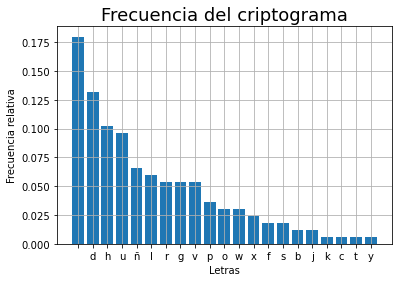

In [21]:
plt.title('Frecuencia del criptograma', fontsize=18)
plt.bar([i[0] for i in frecuencia_del_criptograma],
        [i[2] for i in frecuencia_del_criptograma])
plt.xlabel('Letras')
plt.ylabel('Frecuencia relativa')
plt.grid()

## Probar opciones de intercambio de letras

In [22]:
ls_ = try_swap(criptogram=criptograma,
               letters_to_swap=['d', 'h'],
               possible_change=['a', 'e']) 

olud hñ krulcrpwh gh dñhvld b dñ whufhu gld hp ñd odguxjd ññhjdudp ñdv wursdv dñlgdv txh shuolwludp vxshudu hñ pxohur gh vrñgdgrv gh odulr b prv gdud ylfwruld hñ fhvdu
[('a', 'e'), ('e', 'a')]
Replace: [d] --> [a]
Replace: [h] --> [e]
olua eñ krulcrpwe ge añevla b añ weufeu gla ep ña oaguxja ññejauap ñav wursav añlgav txe seuolwluap vxseuau eñ pxoeur ge vrñgagrv ge oaulr b prv gaua ylfwrula eñ fevau

Replace: [d] --> [e]
Replace: [h] --> [a]
olua eñ krulcrpwe ge añevla b añ weufeu gla ep ña oaguxja ññejauap ñav wursav añlgav txe seuolwluap vxseuau eñ pxoeur ge vrñgagrv ge oaulr b prv gaua ylfwrula eñ fevau



## Esteganografia

In [195]:
# pip install stegano --user

In [60]:
import matplotlib.pyplot as plt
import skimage.io as sk
import numpy as np

from stegano import lsb
from PIL import Image
from matplotlib.pyplot import imshow
from skimage import color

In [133]:
def RGB_to_gray(img, filename):

    width, height = img.size
    for i in range(width):
        for j in range(height):
            r, g, b = list(img.getpixel((i, j)))
            pixel = int(r * 0.3 + g * 0.59 + b * 0.11)
#             print(pixel)
            img.putpixel((i, j), [pixel])
    img.save(filename, "PNG")
    

def twoD_image(img):
    width, height = img.size
    A = np.zeros((width, height))
    for i in range(width):
        for j in range(height):
            r, g, b = list(img.getpixel((i, j)))
            A[i, j] = int(r * 0.3 + g * 0.59 + b * 0.11)
    return A


def threeD_image(matriz):
    width, height = matriz.shape
    img = Image.new('RGB', (width, height))
    for i in range(width):
        for j in range(height):
            pixel = int(matriz[i, j])
            img.putpixel((i, j), tuple([pixel, pixel, pixel]))
    return img


def tranform_mess_to_bin(message):
    message = unidecode(message.replace(' ', '').lower())
    print(message)
    bin_mess = [format(letters_to_numbers.get(i, ''), '05b') for i in list(message)]
    print(bin_mess)
    return "".join(bin_mess)

    
def insert_hidden_message(message, matrix, filename_img, filename_out):
    i=0
    
    data = tranform_mess_to_bin(message)
    flag = False
        width, height = matrix.shape
        for x in range(0, width):
            for y in range(0, height):
                pixel = matrix[x, y]
                print(f"\n{pixel}")
                for n in range(0,3):
                    if(i < len(data)):
                        print(f"{pixel[n]} --> {pixel[n] & ~1 | int(data[i])}")
                        print(f"{format(pixel[n], '05b')} --> {format(pixel[n] & ~1 | int(data[i]), '05b')}")
                        pixel[n] = pixel[n] & ~1 | int(data[i])
                        i+=1
                    else:
                        flag = True
                        break
                img.putpixel((x,y), tuple(pixel))
                if flag: break
            if flag: break
        img.save(filename_out, "PNG")

In [115]:
# filename_cat = 'gato.jpg'
# cat_image = Image.open(filename_cat)#.convert('L')
# RGB_to_gray(cat_image, 'gato_gray.png')

### Least significant bit for images (LSB)
LSB es un algoritmo esteganográfico que encuentra el bit menos significativo en algunos pixeles de la imagen los intercambia con una secuencia de bits presentes en el mensajes secreto.

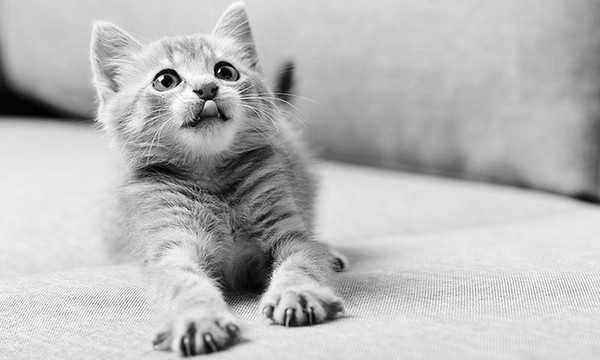

In [116]:
filename_cat = 'gato_gray.png'
cat_image = Image.open(filename_cat)#.convert('L')
cat_image

In [117]:
np.asarray(cat_image)[0]

array([[186, 186, 186],
       [187, 187, 187],
       [190, 190, 190],
       ...,
       [145, 145, 145],
       [144, 144, 144],
       [142, 142, 142]], dtype=uint8)

In [130]:
twoD_image_ = twoD_image(cat_image)
twoD_image_

array([[186., 186., 184., ..., 225., 218., 227.],
       [187., 187., 187., ..., 230., 217., 209.],
       [190., 190., 190., ..., 222., 222., 221.],
       ...,
       [145., 142., 141., ..., 215., 216., 217.],
       [144., 142., 138., ..., 213., 215., 217.],
       [142., 140., 138., ..., 211., 213., 217.]])

In [ ]:
message = 'Los alemanes planean invadir Francia preparen las tropas en la ciudad de Sédan'

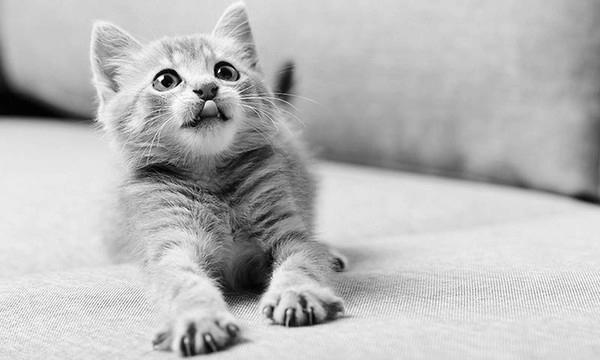

In [132]:
threeD_image_ = threeD_image(twoD_image_)
threeD_image_

In [65]:
print(f"Dimensiones de la imagen: {np.asarray(cat_image).shape}")
np.asarray(cat_image)[0]

Dimensiones de la imagen: (360, 600, 3)


array([[176, 189, 198],
       [177, 190, 199],
       [180, 193, 202],
       ...,
       [136, 148, 162],
       [135, 147, 161],
       [133, 145, 159]], dtype=uint8)

Dimensiones de la imagen: (360, 600)


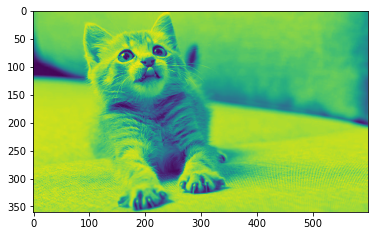

In [74]:
from skimage import color
from skimage import io

cat_image_2 = io.imread('gato.jpg', as_gray=True)
print(f"Dimensiones de la imagen: {cat_image_2.shape}")
imshow(cat_image_2)

In [ ]:
cat_image_2

In [24]:
%%html
<img src='https://miro.medium.com/max/700/1*HeqPeanxAKuHwFHIPev7nw.png'>

In [25]:
%%html
<img src='https://1.bp.blogspot.com/-5mF61sCPL8U/WfWfU8UGBjI/AAAAAAAAIKs/1LLUXJtUvaE-A66v468c6xCMpZXY0XEIwCLcBGAs/s1600/Esteganograf%25C3%25ADa_5.png'>

In [26]:
filepath = "gato.jpg"
image = sk.imread(filepath)

In [27]:
message = "I will be there but you can't find me even if I'm a very very very long sentence"
secret = lsb.hide(filepath, message)
fileoutput = "gato_encoded_.jpg"
secret.save(fileoutput)

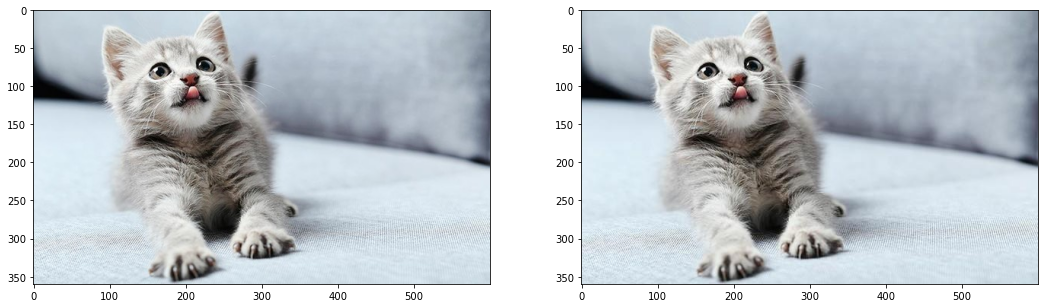

In [28]:
img1 = sk.imread(filepath)
img2 = sk.imread(fileoutput)

fig,ax = plt.subplots(1,2,figsize=(18,8))
    
ax[0].imshow(img1)
ax[1].imshow(img2)

In [29]:
img1[0]

array([[176, 189, 198],
       [177, 190, 199],
       [180, 193, 202],
       ...,
       [136, 148, 162],
       [135, 147, 161],
       [133, 145, 159]], dtype=uint8)

In [30]:
img2[0]

array([[176, 189, 198],
       [177, 190, 199],
       [180, 193, 202],
       ...,
       [137, 149, 163],
       [134, 146, 160],
       [132, 144, 158]], dtype=uint8)

In [31]:
lsb.reveal(secret)

"I will be there but you can't find me even if I'm a very very very long sentence"

In [33]:
format(~2, '08b')

'-0000011'

In [34]:
for i in range(10):
    print(f"{format(i, '05b')} & {format(~2, '05b')} --> {format(i&~1, '05b')} --> {(i&~1)|0 == 0}")

00000 & -0011 --> 00000 --> True
00001 & -0011 --> 00000 --> True
00010 & -0011 --> 00010 --> False
00011 & -0011 --> 00010 --> False
00100 & -0011 --> 00100 --> False
00101 & -0011 --> 00100 --> False
00110 & -0011 --> 00110 --> False
00111 & -0011 --> 00110 --> False
01000 & -0011 --> 01000 --> False
01001 & -0011 --> 01000 --> False


In [35]:
-25-1

-26

In [36]:
format(5 & 1, '05b')

'00001'

In [37]:
i=0
message = 'Los alemanes planean invadir Francia preparen las tropas en la ciudad de Sédan'
data = tranform_mess_to_bin(message)
filename = 'mosters_inc_meme.png'
flag = False
with Image.open(filename) as img:
    width, height = img.size
    for x in range(0, width):
        for y in range(0, height):
            pixel = list(img.getpixel((x, y)))
            print(f"\n{pixel}")
            for n in range(0,3):
                if(i < len(data)):
                    print(f"{pixel[n]} --> {pixel[n] & ~1 | int(data[i])}")
                    print(f"{format(pixel[n], '05b')} --> {format(pixel[n] & ~1 | int(data[i]), '05b')}")
                    pixel[n] = pixel[n] & ~1 | int(data[i])
                    i+=1
                else:
                    flag = True
                    break
            img.putpixel((x,y), tuple(pixel))
            if flag: break
        if flag: break
    img.save("source_secret.png", "PNG")

losalemanesplaneaninvadirfranciapreparenlastropasenlaciudaddesedan
['01011', '01111', '10011', '00000', '01011', '00100', '01100', '00000', '01101', '00100', '10011', '10000', '01011', '00000', '01101', '00100', '00000', '01101', '01000', '01101', '10110', '00000', '00011', '01000', '10010', '00101', '10010', '00000', '01101', '00010', '01000', '00000', '10000', '10010', '00100', '10000', '00000', '10010', '00100', '01101', '01011', '00000', '10011', '10100', '10010', '01111', '10000', '00000', '10011', '00100', '01101', '01011', '00000', '00010', '01000', '10101', '00011', '00000', '00011', '00011', '00100', '10011', '00100', '00011', '00000', '01101']

[5, 5, 5]
5 --> 4
00101 --> 00100
5 --> 5
00101 --> 00101
5 --> 4
00101 --> 00100

[28, 28, 28]
28 --> 29
11100 --> 11101
28 --> 29
11100 --> 11101
28 --> 28
11100 --> 11100

[101, 101, 101]
101 --> 101
1100101 --> 1100101
101 --> 101
1100101 --> 1100101
101 --> 101
1100101 --> 1100101

[189, 189, 189]
189 --> 189
10111101 --> 10111101

11111111 --> 11111111
255 --> 254
11111111 --> 11111110

[255, 255, 255]
255 --> 254
11111111 --> 11111110
255 --> 255
11111111 --> 11111111
255 --> 254
11111111 --> 11111110

[255, 255, 255]
255 --> 254
11111111 --> 11111110
255 --> 255
11111111 --> 11111111
255 --> 255
11111111 --> 11111111

[255, 255, 255]
255 --> 255
11111111 --> 11111111
255 --> 255
11111111 --> 11111111
255 --> 255
11111111 --> 11111111

[255, 255, 255]
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110

[255, 255, 255]
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110

[255, 255, 255]
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110

[255, 255, 255]
255 --> 255
11111111 --> 11111111
255 --> 254
11111111 --> 11111110
255 --> 254
11111111 --> 11111110

[255, 255, 255]
255 --> 255
11111111 --> 11111111
255 --> 255
11111111 --> 11111111
255 --> 254
11111111 --> 1

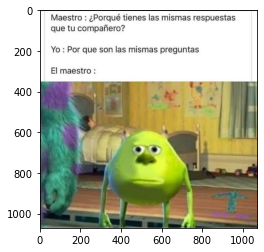

In [38]:
imshow(np.asarray(img))

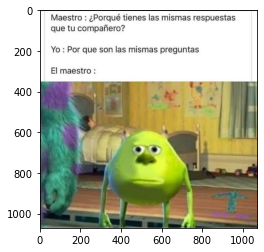

In [39]:
# img.show()
img2 = Image.open('source_secret.png')
imshow(np.asarray(img2))

In [40]:
extracted_bin = []
i=0
flag = False
with Image.open("source_secret.png") as img:
    width, height = img.size
    byte = []
    for x in range(0, width):
        for y in range(0, height):
            pixel = list(img.getpixel((x, y)))
            for n in range(0,3):
                if(i < len(data)):
                    extracted_bin.append(pixel[n]&1)
                    i+=1
                else:
                    flag = True
                    break
            if flag: break
        if flag: break
data_ = "".join([str(x) for x in extracted_bin])

In [41]:
data_

'010110111110011000000101100100011000000001101001001001110000010110000001101001000000001101010000110110110000000001101000100100010110010000000110100010010000000010000100100010010000000001001000100011010101100000100111010010010011111000000000100110010001101010110000000010010001010100011000000001100011001001001100100000110000001101'

In [42]:
result_lsb = [int(data_[i*5:(i+1)*5], 2) for i in range(len(data_)//5)]
print(result_lsb)

[11, 15, 19, 0, 11, 4, 12, 0, 13, 4, 19, 16, 11, 0, 13, 4, 0, 13, 8, 13, 22, 0, 3, 8, 18, 5, 18, 0, 13, 2, 8, 0, 16, 18, 4, 16, 0, 18, 4, 13, 11, 0, 19, 20, 18, 15, 16, 0, 19, 4, 13, 11, 0, 2, 8, 21, 3, 0, 3, 3, 4, 19, 4, 3, 0, 13]


In [43]:
"".join([numbers_to_letters.get(i) for i in result_lsb])

'losalemanesplaneaninvadirfranciapreparenlastropasenlaciudaddesedan'